# Plotting the Non-Motile Diffusive Model

### This model is derived by relating the organism's metabolic rate (based on the Metabolic Theory of Ecology) to the organism's rate of nutrient uptake through diffusion using an inequality. 

$a \leq  \left(\frac{2}{3} \frac{k_b T}{\eta_0 r} e^{\frac{-A}{T-C}}C_{\infty} \frac{e^{\frac{E_a}{R T}}}{B_0} \right)^{\frac{1}{3\alpha -1}}$

### Or using a reference temperature $T_0$:
$a \leq  \left(\frac{2}{3} \frac{k_b T}{\eta_0 r} e^{\frac{-A}{T-C}}C_{\infty} \frac{e^{\frac{-E_a(T-T_0)}{R T T_0}}}{B_0} \right)^{\frac{1}{3\alpha -1}}$

In [83]:
import numpy as np
from matplotlib import pyplot as plt

## Parameters:

In [84]:
k_b = 1.380649e-23      #Boltzmann's Constant [J K^-1]
R = 8.617333262e-5      #Boltzmann's Constant [eV K^-1]
r = 3.8e-10             #Bond Length of O_2 (1.2075 A), used for Stokes radius for Diffusivity, or Stokes' Radius for Glucose (3.8 A) [m]
rho = 1.15              #Density of cell, [g/ml]=[kg/l]
b0 = np.exp(19.21)      #MTE normalization constant, value taken from unicells from J. Brown et al 2004
Ea = 0.62               #Average activation energy according to J. Brown et al 2004 and Gilooly et al 2001 [eV]
eta0= 0.02939e-3        #Dynamic viscosity constant of water, [Pa*s], [kg/m*s^2]
A = 507.88              #Vogel equation constant for water [K]
C = 149.3               #Vogel equation second constant for water [K]
alpha = 1               #Exponential scaling coefficient, 3/4 for multicellular euks, 1 for unicellular euks.
Cyield = 1.4e6          #Energetic Yield per mol of nutrient uptake [J/mol] for glucose (1.4e6 using ATP/glucose energy conversion)
T0 = 293.15             #Reference Temperature [K]                

B0 = b0*((4/3)*np.pi*rho)**alpha        #Combination of constants

Tc = np.linspace(-5,10,100)              # Temperature [C] used for plotting
T = Tc + 273.15                          #Temperature [K] used for calculations
Cinf = 10**np.linspace(-2,0,100)        #Resource/Biomass Concentration [M]


## Model Functions:

In [85]:
# Physical Values:

def Viscosity(T):
    vis = eta0*np.exp(A/(T-C))
    return vis

def Diffusivity(T,r):
    dif = k_b*T/(6*np.pi*eta0*r)*np.exp(-A/(T-C))
    return dif


# Uptake:

def DifUptake(T,Cinf,a):
    up  = (2/3)*k_b*T/(eta0*r)*np.exp(-A/(T-C))*Cinf*Cyield*a
    return up

# Metabolism: 

def DifMet(T,a):
    met = B0*np.exp(-Ea/(R*T))*a**(3*alpha)
    return met

def DifMetTC(T,a):
    met = B0*np.exp(Ea*(T-T0)/(R*T*T0))*a**(3*alpha)
    return met

# Cell size:

def DifRad(T,Cinf):               
    # Calculate Maximum Radius of Diffusive Cell given T and Cinf

    a = ((2/3)*k_b*T/(eta0*r)*np.exp(-A/(T-C))*np.exp(Ea/(R*T))*Cinf*Cyield/B0)**(1/(3*alpha-1))
    return a

def DifRadTC(T,Cinf):
    # Calculate Maximum Radius of Diffusive Cell given T and Cinf, using a reference temperature provided above
    a = ((2/3)*k_b*T/(eta0*r)*np.exp(-A/(T-C))*np.exp(-Ea*(T-T0)/(R*T*T0))*Cinf*Cyield/B0)**(1/(3*alpha-1))
    return a

def DifRadTCEa(T,Cinf,Ea):
    # Calculate Maximum Radius of Diffusive Cell given T and Cinf, using a reference temperature provided above
    a = ((2/3)*k_b*T/(eta0*r)*np.exp(-A/(T-C))*np.exp(-Ea*(T-T0)/(R*T*T0))*Cinf*Cyield/B0)**(1/(3*alpha-1))
    return a

## Contour Maps showing Activation Energy Effect:

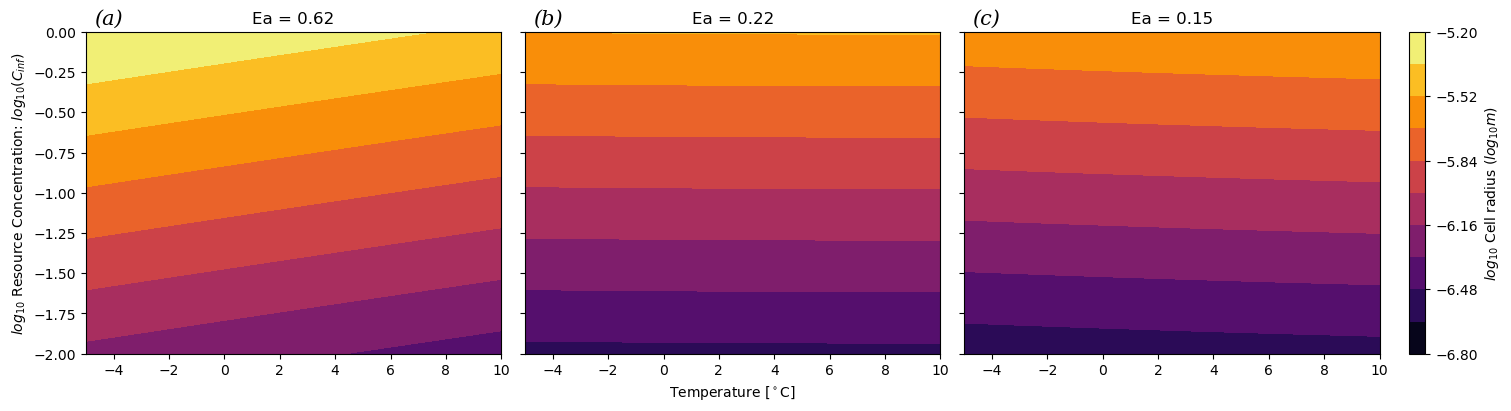

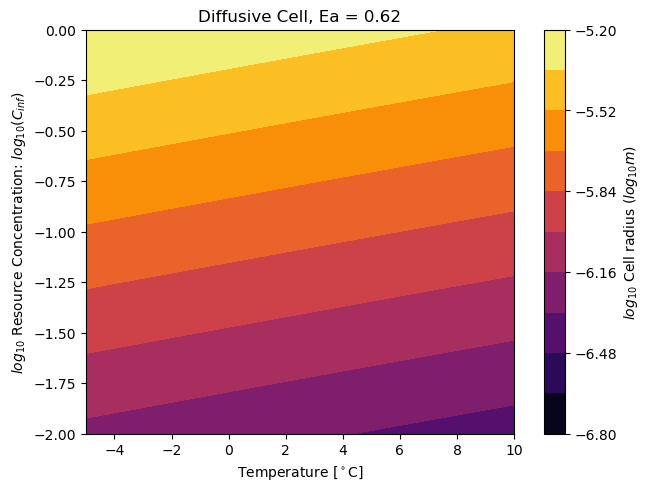

In [86]:
aaa = []
aas0 = []
aas1 = []
aas2 = []
# Variables
Ea0 = 0.62
Ea1 = 0.22
Ea2 = 0.15
# Model Equation:
for i in range(len(T)):
    aa0 = []
    aa1 = []
    aa2 = []
    for j in range(len(Cinf)):
        a0 = DifRadTCEa(T[i],Cinf[j],Ea0)
        aa0.append(a0)

        a1 = DifRadTCEa(T[i],Cinf[j],Ea1)
        aa1.append(a1)

        a2 = DifRadTCEa(T[i],Cinf[j],Ea2)
        aa2.append(a2)

        aaa.append(a0)
        aaa.append(a1)
        aaa.append(a2)
    aas0.append(aa0)
    aas1.append(aa1)
    aas2.append(aa2)

    
fig, axs = plt.subplots(1,3,sharex=True,sharey=True,layout='constrained',figsize=(15, 4))
#plt.suptitle('Non-Motile Diffusive Cell Radius, Reference Temp = %.2f' %T0)

c, t = np.meshgrid(Cinf, Tc)
levels = np.linspace(np.min(np.log10(aaa)), np.max(np.log10(aaa)), 10)
levels = np.linspace(-6.8, -5.2, 11)

cs = axs[0].contourf(t,np.log10(c),np.log10(aas0),levels=levels,cmap='inferno')
plt.subplot(1,3,1)
axs[0].set_ylabel(r'$log_{10}$ Resource Concentration: '+r'$log_{10}(C_{inf})$')
axs[0].set_title('Ea = %.2f' %Ea0)


cs = axs[1].contourf(t,np.log10(c),np.log10(aas1),levels=levels,cmap='inferno')
plt.subplot(1,3,2)
axs[1].set_xlabel(r'Temperature [$^\circ$C]')
axs[1].set_title('Ea = %.2f' %Ea1)

cs = axs[2].contourf(t,np.log10(c),np.log10(aas2),levels=levels,cmap='inferno')
plt.subplot(1,3,3)
cbar = fig.colorbar(cs)
axs[2].set_title('Ea = %.2f' %Ea2)
cbar.ax.set_ylabel(r'$log_{10}$ Cell radius ($log_{10}m$)')


axs[0].text(0.02, 1.07, '(a)', transform=axs[0].transAxes, fontsize=15, fontname='serif', fontstyle='italic', va='top')  # Label subplot a
axs[1].text(0.02, 1.07, '(b)', transform=axs[1].transAxes, fontsize=15, fontname='serif', fontstyle='italic', va='top')  # Label subplot b
axs[2].text(0.02, 1.07, '(c)', transform=axs[2].transAxes, fontsize=15, fontname='serif', fontstyle='italic', va='top')  # Label subplot c

plt.show()


fig, axs = plt.subplots(1,1,layout = 'constrained')
c, t = np.meshgrid(Cinf, Tc)
#levels = np.linspace(np.min(np.log10(aaa)), np.max(np.log10(aaa)), 10)


cs = axs.contourf(t,np.log10(c),np.log10(aas0),levels=levels,cmap='inferno')
axs.set_ylabel(r'$log_{10}$ Resource Concentration: '+r'$log_{10}(C_{inf})$')
axs.set_xlabel(r'Temperature [$^\circ$C]')
axs.set_title('Diffusive Cell, Ea = %.2f' %Ea0)
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'$log_{10}$ Cell radius ($log_{10}m$)')
plt.show()

## Viscosity, Diffusivity, Uptake, and Metabolic Temperature Dependence:

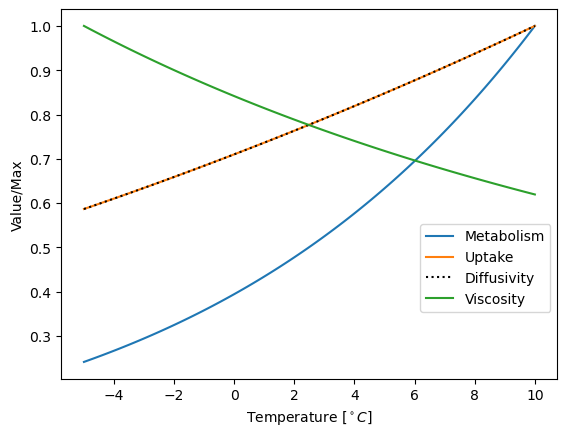

In [87]:
Cinf1 = 1e-2                # Constant Nutrient/Resource Concentration
a = 1e-6                # Constant Organism Radius
up  = DifUptake(T,Cinf1,a)
met = DifMetTC(T,a)
vis = Viscosity(T)
dif = Diffusivity(T,a)

plt.plot(Tc,met/np.max(met), label = 'Metabolism')
plt.plot(Tc,up/np.max(up), label = 'Uptake')
plt.plot(Tc,dif/np.max(dif),'k:', label = 'Diffusivity')
plt.plot(Tc,vis/np.max(vis), label = 'Viscosity')
plt.xlabel(r'Temperature [$^\circ C$]')
plt.ylabel('Value/Max')
plt.legend(loc = 'right',  bbox_to_anchor=(1., 0.3))
plt.show()

### Temperature Dependence:

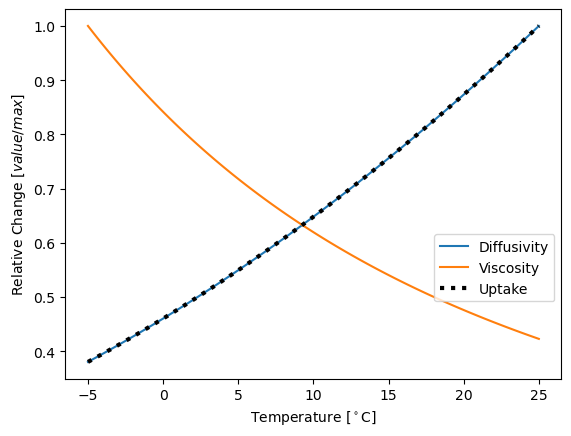

In [88]:

Cinf1 = 1e-2
a = 1e-5

Tc = np.linspace(-5,25,101)
T = Tc + 273.15


T0 = 293.15
# Model Equation:
up  = DifUptake(T,Cinf1,a)
met = DifMetTC(T,a)
vis = Viscosity(T)
dif = Diffusivity(T,a)


plt.plot(Tc,dif/np.max(dif), label = 'Diffusivity')
plt.plot(Tc,vis/np.max(vis),  label = 'Viscosity')
plt.plot(Tc,up/np.max(up),':k',linewidth=3,  label = 'Uptake')
# plt.title('Temperature Relationships (Ref. Temp. = %.2f C)' %(T0-273.15))
plt.xlabel(r'Temperature [$^\circ$C]')
plt.ylabel(r'Relative Change [$value/max$]')
plt.legend(loc = 'right',  bbox_to_anchor=(1., 0.3))
plt.show()

### Temperature Scaling with varying $E_a$:

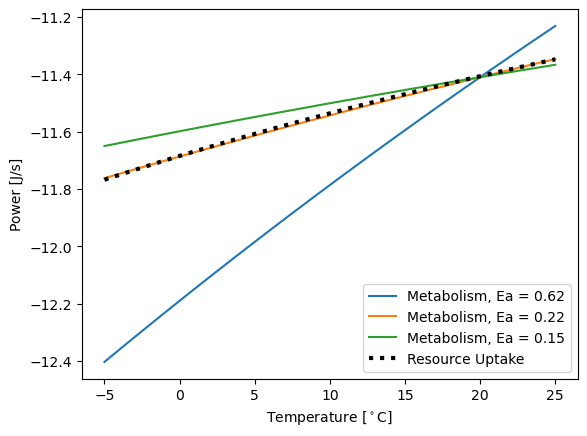

In [89]:
a = 0.3e-8
a0 = 1e-6
Cinf = 0.132
up  = DifUptake(T,Cinf,a)  #NOTE: 10^2.82 is added to this to raise the uptake (see plotting)

Ea0 = 0.62               #Average activation energy according to J. Brown et al 2004 and Gilooly et al 2001 [eV]
B0 = 10**(-14.5) / (np.exp(-Ea0/(R*T0))*a0**(3*alpha))    # Calculation of B0 based on a known metabolism at a known temperature
B0ref = B0
met0 = B0*np.exp(Ea0*(T-T0)/(R*T*T0))*a**(3*alpha)

Ea1 = 0.22
met1 = B0*np.exp(Ea1*(T-T0)/(R*T*T0))*a**(3*alpha)

Ea2 = 0.15
met2 = B0*np.exp(Ea2*(T-T0)/(R*T*T0))*a**(3*alpha)

Tc = T-273.15

# Plotting: 
plt.plot(Tc,np.log10(met0), label = 'Metabolism, Ea = %.2f'%Ea0)
plt.plot(Tc,np.log10(met1), label = 'Metabolism, Ea = %.2f'%Ea1)
plt.plot(Tc,np.log10(met2), label = 'Metabolism, Ea = %.2f'%Ea2)
plt.plot(Tc,np.log10(up),':k',linewidth=3, label = 'Resource Uptake')


# plt.title('Impact of Ea on Temperature Scaling')
plt.xlabel(r'Temperature [$^\circ$C]')
plt.ylabel('Power [J/s]')
plt.legend(loc = 'lower right')

plt.show()

## Cell Radius Dependence:

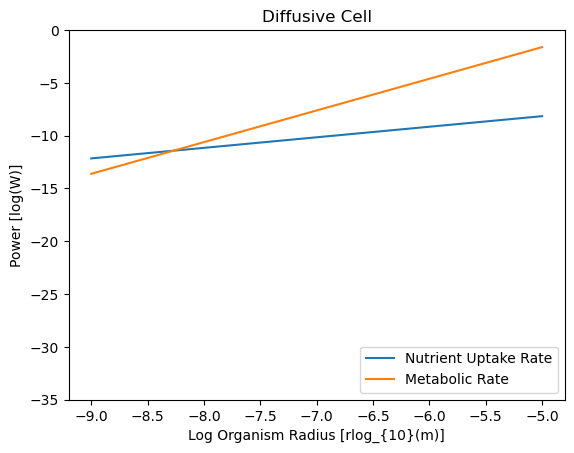

In [90]:

T = 273.15  #Temperature [K]
Cinf1 = 0.1
aexp = np.linspace(-9,-5,100)
a = 10**aexp

up1 = DifUptake(T,Cinf1,a)
met1 = DifMetTC(T,a)

a0 = 1e-6
Cinf = 0.132
up  = DifUptake(T,Cinf,a)  #NOTE: 10^2.82 is added to this to raise the uptake (see plotting)

Ea0 = 0.62               #Average activation energy according to J. Brown et al 2004 and Gilooly et al 2001 [eV]
B0 = 10**(-14.5) / (np.exp(-Ea0/(R*T0))*a0**(3*alpha))    # Calculation of B0 based on a known metabolism at a known temperature
B0ref = B0
met0 = B0*np.exp(Ea0*(T-T0)/(R*T*T0))*a**(3*alpha)



plt.plot(np.log10(a),np.log10(up), label = 'Nutrient Uptake Rate')
plt.plot(np.log10(a),np.log10(met0), label = 'Metabolic Rate')
plt.ylim(bottom = -35,top = 0)
plt.title('Diffusive Cell')
plt.xlabel(r'Log Organism Radius [rlog_{10}(m)]')
plt.ylabel('Power [log(W)]')
plt.legend(loc = 'lower right')
plt.show()